# Chapter 2 Practical

## Zero mean white noise autocovariance

In [1]:
import numpy as np

In [2]:
rng = np.random.default_rng(9)  # 9 is seed

In [3]:
def random_array_zero_center(bound, length):
    """
    :param bound: generates random values from [-bound, bound]
    :param length: array length to generate
    """
    return 2 * bound * rng.random(length) - bound

In [4]:
white_noise_64 = random_array_zero_center(1, 64)
print(white_noise_64[:10])
np.average(white_noise_64)

[ 0.74049841 -0.42636558  0.2062963   0.55506817  0.43214926  0.83076024
  0.7207873   0.83647526 -0.94682453 -0.125504  ]


0.073580576380466

In [5]:
white_noise_512 = random_array_zero_center(1, 512)
np.average(white_noise_512)

-0.008048000979764233

In [6]:
white_noise_4096 = random_array_zero_center(1, 4096)
np.average(white_noise_4096)


0.0005339755126787786

Mean approaches zero as the length of the random sequence increases.

In [7]:
import statsmodels.api as sm

In [8]:
def autocovariance(sequence):
    return sm.tsa.stattools.acovf(sequence, fft=False)

autocov_64 = autocovariance(white_noise_64)
autocov_512 = autocovariance(white_noise_512)
autocov_4096 = autocovariance(white_noise_4096)

In [9]:
import matplotlib.pyplot as plt
from scipy import stats

DescribeResult(nobs=64, minmax=(-0.10034152318752937, 0.3778419096642083), mean=0.002951889919251627, variance=0.0035343757692085837, skewness=3.82277488406955, kurtosis=22.98239428497803)

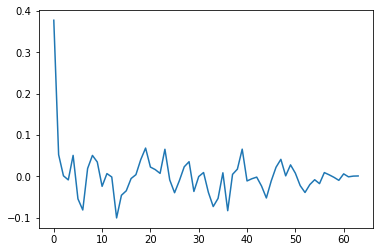

In [10]:
plt.plot(autocov_64)
stats.describe(autocov_64)

DescribeResult(nobs=512, minmax=(-0.04163661216857269, 0.3128923926938585), mean=0.00030555897724009613, variance=0.00028983194585480577, skewness=12.055263062972754, kurtosis=220.39956894010007)

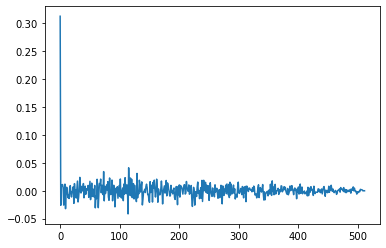

In [11]:
plt.plot(autocov_512)
stats.describe(autocov_512)

DescribeResult(nobs=4096, minmax=(-0.01451565218517448, 0.3214027395205685), mean=3.923373285163184e-05, variance=3.7841434758737304e-05, skewness=34.811760853252295, kurtosis=1816.7431575109345)

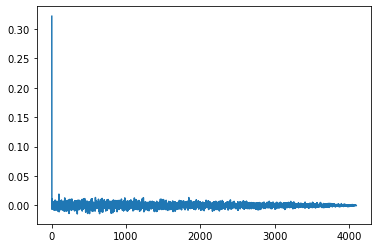

In [12]:
plt.plot(autocov_4096)
stats.describe(autocov_4096)

As expected, the mean and variance of the autocovariance sequence approach zero as sequence length increases.

## Autocovariance of EEG

In [18]:
import os
import mne

Because the OpenBCI RAW format is not supported by mne, we must manually read the data into an array.

*Future reference: Record from OpenBCI GUI in the BDF format rather than RAW.*

In [25]:
with open(os.path.join('..', '..', '..', 'data', 'self-recorded', 'eog-noise', '8blinks_OpenBCI-RAW-2021-02-05_10-05-32.txt'), 'r') as eog_noise_file:
    eog_noise_lines = eog_noise_file.readlines()

eog_noise_samples = eog_noise_lines[6:]  # skip to first data sample

fp1 = []
for sample in eog_noise_samples:
    fp1.append(float(sample.split(',')[3]))

fp1_electrode = np.array([fp1])
del fp1

print(fp1_electrode[:10])

[[41044.37109375 41385.70703125 41374.59765625 ... 42025.48046875
  41830.70703125 42092.71484375]]


Now we may create an MNE info object with some information about our data.

In [23]:
samp_freq = 250
channel_types = ['eeg']
channel_names = ['fp1']
info = mne.create_info(ch_names=channel_names, sfreq=samp_freq, ch_types=channel_types)
info

<Info | 7 non-empty values
 bads: []
 ch_names: fp1
 chs: 1 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: unspecified
 nchan: 1
 projs: []
 sfreq: 250.0 Hz
>

Note that the mne info object sets a lowpass filter at half of the sample frequency (125 Hz).

In [26]:
raw = mne.io.RawArray(fp1_electrode, info)

Creating RawArray with float64 data, n_channels=1, n_times=5651
    Range : 0 ... 5650 =      0.000 ...    22.600 secs
Ready.


Effective window size : 8.192 (s)
Need more than one channel to make topography for eeg. Disabling interactivity.


<ipython-input-36-a5fc32074e8d>:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd()


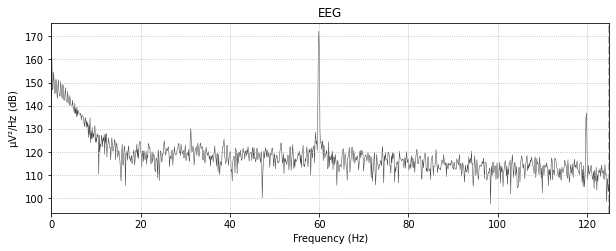

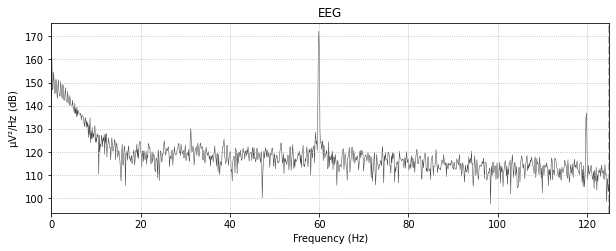

In [36]:
raw.plot_psd()

With the PSD plot, we see the significant power line noise at 60Hz and the 120Hz harmonic.

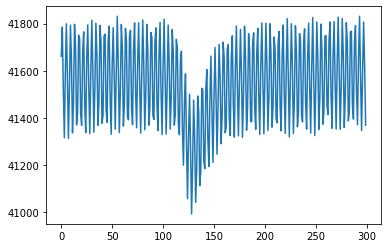

In [16]:
plt.plot(fp1_electrode[2500:2800])